# Image Segmentation Using K-Means Clustering

## Import Libraries

In [1]:
import cv2
from kmeans import KMeansClustering
import matplotlib.pyplot as plt
import numpy as np

## Import Test Image

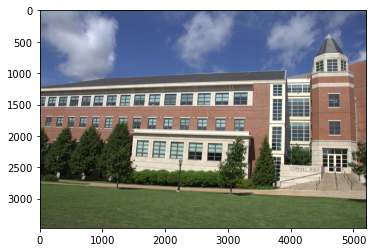

In [2]:
image = cv2.imread("images/cornell-hall-middle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Reshape Test Image

In [4]:
image_pixels = image.reshape((-1, 3))
image_pixels = np.float32(image_pixels)
print(image_pixels)
print(image_pixels.shape)

[[128. 139. 157.]
 [130. 137. 155.]
 [134. 141. 159.]
 ...
 [ 62.  74.  54.]
 [ 71.  65.  49.]
 [ 73.  63.  38.]]
(18024930, 3)


## Predict Image Clusters

In [7]:
k = KMeansClustering()
pred = k.predict(image_pixels)

array([[152.86193848, 172.49162292, 185.51283264],
       [122.50174713,  98.51776123,  83.79270935],
       [ 51.38579559,  54.06222916,  35.58285141]])

In [8]:
centers = np.uint8(k.cent())
centers

array([[152, 172, 185],
       [122,  98,  83],
       [ 51,  54,  35]], dtype=uint8)

In [12]:
pred = pred.astype(int)
np.unique(pred)

array([0, 1, 2])

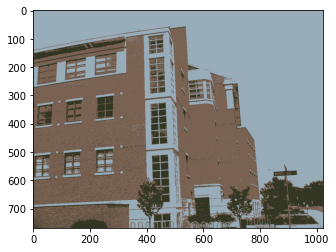

In [18]:
labels = pred.flatten()
out_image = centers[labels.flatten()]
out_image = out_image.reshape(image.shape)
plt.imshow(out_image)